<div style="background-color: #006400; color: #FAFAD2; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #8B0000;">
<h2>Section 5-1 Data Wrangling Intermediate</h2>
<p>Install the following extensions to Visual Code Studio<p>
<ol>
    <li>Python<br>
        a. Pylance<br>
        b. Python - Install Appropriate Versions<br>
        c. Python - Debugger<br>
    </li>
    <p>   <p>
    <li>GitHub Copilot<br>
        a. GitHub Copilot Chat<br>
        b. GitHub Plus Theme<br>
        c. GitHub Repositories<br>
    <p>   <p>
    <li>Jupyter<br>
        a. Jupyter Cell Tags<br>
        b. Jupyter Notebook Renderers<br>
        c. Jupyter Slide Show<br>
    </li>
</ol>
</div>


In [1]:
# Basic imports for data analysis, make sure they are installed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import requests

# Not all of these are necessary, but they are useful for data analysis



<h3>Download Data Frame from Website, add headers, create data frame and save to Excel file</h3>


In [10]:
#### Load Data and store in dataframe Auto_df

import pandas as pd
import numpy as np
import os

datapath = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python/Auto85.xlsx'  # Ensure this path is correct
Auto_df = pd.read_excel(datapath)

headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']    

# Load the data into a DataFrame
Auto_df = pd.read_excel(datapath, names=headers)
print(Auto_df)

# Display the first few rows of the dataframe
headrows = Auto_df.head()
print(headrows)

# Describe the data
describe = Auto_df.describe()
print(describe)

# Display the data types of the columns
aut_types = Auto_df.dtypes
print(aut_types)


     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

<div style="background-color: #008080; color: #FAFAD2; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #000000;">
<h2 id="discriptive_statistics">Section 1-2. Identify and handle mising values</h2>
<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>
<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
<p>In the car dataset, missing data comes with the question mark "?".<p>
<p>We replace "?" with NaN (Not a Number), Python's default missing value marker for<p>
<p> reasons of computational speed and convenience. Here we use the function: <p>
<pre>.replace(A, B, inplace = True) to replace A by B.</pre>
</div>


In [12]:
# Identify a Column with a "?" mising value

import pandas as pd
import numpy as np

# show a frequncy table of the column "price"

print(Auto_df["price"].value_counts())

# replace "?" to NaN
print(Auto_df.head(5))
Auto_df.replace("?", np.nan, inplace = True)
print(Auto_df.head(5))

price
?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 187, dtype: int64
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           f

<div style="background-color: #DC143C; color: #000000; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #8B0000;">
<h3>Section 1-3 Evaluating for Missing Data</h3>
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
<ol>
<p>   </p>
<p>The missing values are converted by default. We use the following functions to identify these missing values.<p>
<p>There are two methods to detect missing data:<p>
<p>The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.<p>
</div>



In [13]:
### Check for missing data in Auto_df

missing_data = Auto_df.isnull() # True if missing data, False if not missing data
missing_data.head(5) # Display the first 5 rows of data frame with missing data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


missing_data = df.isnull()
missing_data.head(5)

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>

In [14]:
### Count missing values in each column

for column in missing_data.columns.values.tolist(): # Loop through each column
    print(column)
    print (missing_data[column].value_counts()) # Count the number of missing data in each column
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>

In [15]:
avg_norm_loss = Auto_df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>

In [16]:
import numpy as np

# Replace NaN values in the 'normalized-losses' column with avg_norm_loss

Auto_df["normalized-losses"] = Auto_df["normalized-losses"].replace(np.nan, avg_norm_loss)

<h4>Calculate the mean value for the "bore" column</h4>

In [17]:
#### Calculate the mean value for the 'bore' column

avg_bore=Auto_df['bore'].astype('float').mean(axis=0) # Calculate the mean value for the 'bore' column
print("Average of bore:", avg_bore) # Print the mean value for the 'bore' column

Average of bore: 3.3297512437810943


In [18]:
import pandas as pd

def clean_data(Auto_df):
    # One-hot encode column: 'make'
    insert_loc = Auto_df.columns.get_loc('make')
    Auto_df = pd.concat([Auto_df.iloc[:,:insert_loc], pd.get_dummies(Auto_df.loc[:, ['make']]), Auto_df.iloc[:,insert_loc+1:]], axis=1)
    return Auto_df

Auto_df_clean = clean_data(Auto_df.copy())
Auto_df_clean.head()

,symboling,normalized-losses,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,True,False,False,False,False,False,False,False,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,True,False,False,False,False,False,False,False,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,True,False,False,False,False,False,False,False,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,False,True,False,False,False,False,False,False,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,False,True,False,False,False,False,False,False,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
"""
Cell generated by Data Wrangler.
"""
import pandas as pd

def clean_data(Auto_df):
    # One-hot encode column: 'make'
    insert_loc = Auto_df.columns.get_loc('make')
    Auto_df = pd.concat([Auto_df.iloc[:,:insert_loc], pd.get_dummies(Auto_df.loc[:, ['make']], dummy_na=True), Auto_df.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to int8 for columns: 'make_alfa-romero', 'make_audi' and 21 other columns
    Auto_df = Auto_df.astype({'make_alfa-romero': 'int8', 'make_audi': 'int8', 'make_bmw': 'int8', 'make_chevrolet': 'int8', 'make_dodge': 'int8', 'make_honda': 'int8', 'make_isuzu': 'int8', 'make_mazda': 'int8', 'make_jaguar': 'int8', 'make_mercedes-benz': 'int8', 'make_mercury': 'int8', 'make_mitsubishi': 'int8', 'make_nissan': 'int8', 'make_peugot': 'int8', 'make_porsche': 'int8', 'make_plymouth': 'int8', 'make_renault': 'int8', 'make_saab': 'int8', 'make_subaru': 'int8', 'make_toyota': 'int8', 'make_nan': 'int8', 'make_volvo': 'int8', 'make_volkswagen': 'int8'})
    # Change column type to float64 for column: 'normalized-losses'
    Auto_df = Auto_df.astype({'normalized-losses': 'float64'})
    return Auto_df

Auto_df_clean = clean_data(Auto_df.copy())
Auto_df_clean.head()

,symboling,normalized-losses,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,1,0,0,0,0,0,0,0,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,1,0,0,0,0,0,0,0,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,1,0,0,0,0,0,0,0,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,0,1,0,0,0,0,0,0,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,0,1,0,0,0,0,0,0,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Replace "NaN" with the mean value in the "bore" column</h4>

In [20]:
#### Old version Auto_df["bore"].replace(np.nan, avg_bore, inplace=True)

Auto_df["bore"] = Auto_df["bore"].replace(np.nan, avg_bore)

In [21]:
#Calculate the mean value for "stroke" column

avg_stroke = round(Auto_df["stroke"].astype("float").mean(axis = 0),2)

print("Average of stroke:", avg_stroke) 

# replace NaN by mean value in "stroke" column

# Auto_df["stroke"].replace(np.nan, avg_stroke, inplace = True) <<<<Old version

Auto_df["stroke"] = Auto_df["stroke"].replace(np.nan, "stroke")

Average of stroke: 3.26


<h4>Calculate the mean value for the "horsepower" column</h4>

In [23]:
# Convert 'horsepower' to numeric, setting errors='coerce' to handle non-numeric values
Auto_df['horsepower'] = pd.to_numeric(Auto_df['horsepower'], errors='coerce')

# Calculate the average horsepower and print it
avg_horsepower = round(Auto_df['horsepower'].mean(), 2)
print("Average horsepower:", avg_horsepower)

"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Change column type to float64 for column: 'horsepower'
    df = df.astype({'horsepower': 'float64'})
    # Round column 'horsepower' (Number of decimals: 0)
    df = df.round({'horsepower': 0})
    return df

Auto_df = clean_data(Auto_df)
Auto_df['avg_hp_clean'] = Auto_df['horsepower']
Auto_df['avg_hp_clean'].head()

# Calculate the average horsepower for different car makes and print the sorted table
avg_hp = Auto_df[['make', 'avg_hp_clean']].groupby('make').mean().sort_values(by='avg_hp_clean', ascending=False)
print(avg_hp)


Average horsepower: 104.26
               avg_hp_clean
make                       
porsche          210.400000
jaguar           204.666667
mercury          175.000000
mercedes-benz    146.250000
bmw              138.875000
volvo            128.000000
saab             126.666667
alfa-romero      125.333333
audi             121.000000
mitsubishi       104.076923
nissan           102.555556
peugot            99.818182
toyota            92.781250
plymouth          86.714286
dodge             86.333333
subaru            86.250000
mazda             85.529412
volkswagen        81.083333
honda             80.230769
isuzu             77.000000
chevrolet         62.666667
renault                 NaN


In [2]:
import pandas as pd
import numpy as np
import os


datapath = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python/Auto85.xlsx'  # Ensure this path is correct
Auto_df = pd.read_excel(datapath)

# Convert 'horsepower' to numeric, setting errors='coerce' to handle non-numeric values
Auto_df['horsepower'] = pd.to_numeric(Auto_df['horsepower'], errors='coerce')

# Calculate the average horsepower and print it
avg_horsepower = round(Auto_df['horsepower'].mean(), 2)
print("Average horsepower:", avg_horsepower)

"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Change column type to float64 for column: 'horsepower'
    df['horsepower'] = df['horsepower'].astype('float64')
    # Round column 'horsepower' (Number of decimals: 0)
    df['horsepower'] = df['horsepower'].round(0)
    return df

# Clean the horsepower data
Auto_df = clean_data(Auto_df) # Clean the horsepower data in the DataFrame Auto_df 
print(Auto_df['horsepower'].head()) # Print the first five rows of the 'horsepower' column

# Calculate the average horsepower for different car makes
avg_hp = Auto_df[['make', 'horsepower']].groupby('make').mean().sort_values(by='horsepower', ascending=False)

# Format the horsepower column to display two decimal places
avg_hp['horsepower'] = avg_hp['horsepower'].apply(lambda x: f"{x:.2f}")

Average horsepower: 104.26
0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64


In [3]:
Auto_df['price'] = Auto_df['price'].replace('?', np.nan)
Auto_df = Auto_df.astype({'price': 'float64'})
Auto_df['price'] = Auto_df['price'].astype('Int64')


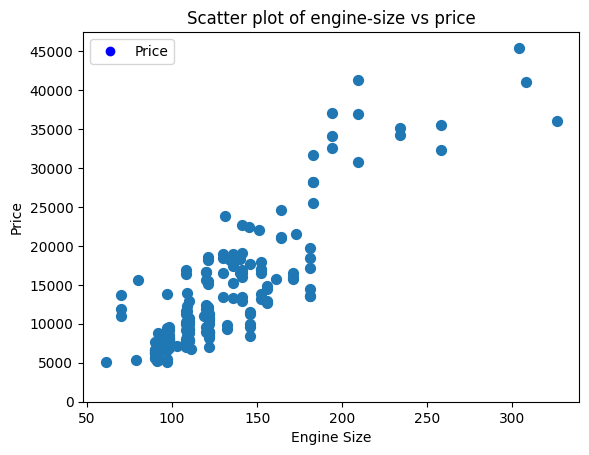

In [6]:
### Scatter Plot of Engine Size vs Price

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
%matplotlib inline

datapath = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python/Auto85.xlsx'  # Ensure this path is correct
Auto_df = pd.read_excel(datapath)

# Define the headers
headers = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
    "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"
]

Auto_df['price'] = Auto_df['price'].replace('?', np.nan)
Auto_df = Auto_df.astype({'price': 'float64'})
Auto_df['price'] = Auto_df['price'].astype('Int64')

# Calculate the maximum price
ymax = int(Auto_df['price'].max() + 1000) # Add 1000 to the maximum price to make the plot more readable

# Create a scatter plot of 'engine-size' vs 'price'
x = Auto_df['engine-size']
y = Auto_df['price']
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)

Auto_df.plot(kind='scatter', x='engine-size', y='price')
plt.plot(x, poly(x), color='red')
plt.title('Scatter plot of engine-size vs price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.scatter(Auto_df['engine-size'], Auto_df['price'], s=50)
plt.yticks(np.arange(0, ymax, 5000))
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in ['blue']]
plt.legend(markers, ['Price'], numpoints=1, loc='upper left')
plt.show()


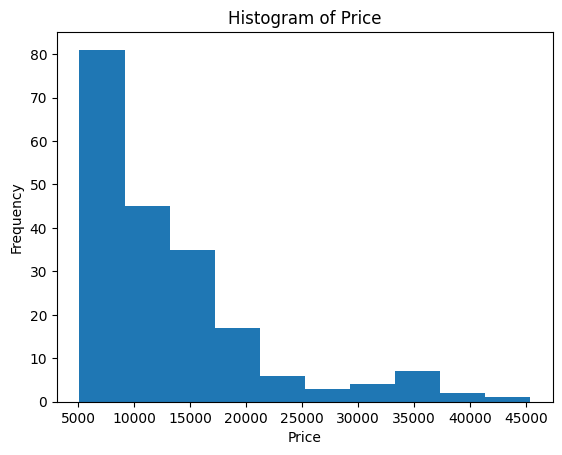

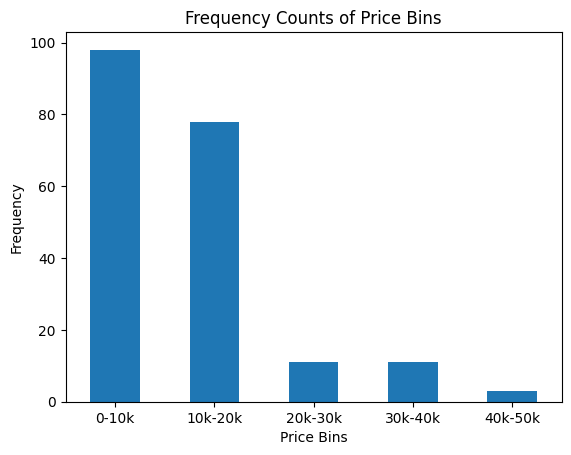

In [14]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt

datapath = '/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/BIS 411 - Fall 2024/Python-Fall-2024-Notebooks/Data Files for Python/Auto85.xlsx'  # Ensure this path is correct
Auto_df = pd.read_excel(datapath)

# Ensure 'price' column is numeric
Auto_df['price'] = pd.to_numeric(Auto_df['price'], errors='coerce')

# Drop rows with NaN values in 'price' column
Auto_df = Auto_df.dropna(subset=['price'])

# Plot histogram of price
Auto_df['price'].plot(kind='hist', bins=10)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Define bins and create price_bins column
bins = [0, 10000, 20000, 30000, 40000, 50000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k']
Auto_df['price_bins'] = pd.cut(Auto_df['price'], bins=bins, labels=labels, include_lowest=True)

# Plot frequency counts of price bins
Auto_df['price_bins'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency Counts of Price Bins')
plt.xlabel('Price Bins')

rotated_xticks = plt.xticks(rotation=0)

plt.ylabel('Frequency')
plt.show()

